# Fashion MNIST 

In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.metrics import ConfusionMatrixDisplay
from collections import Counter
%matplotlib inline

In [4]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Train data shape

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

Test data shape

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
# Verify if labels are 1D array
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
# Define classes
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

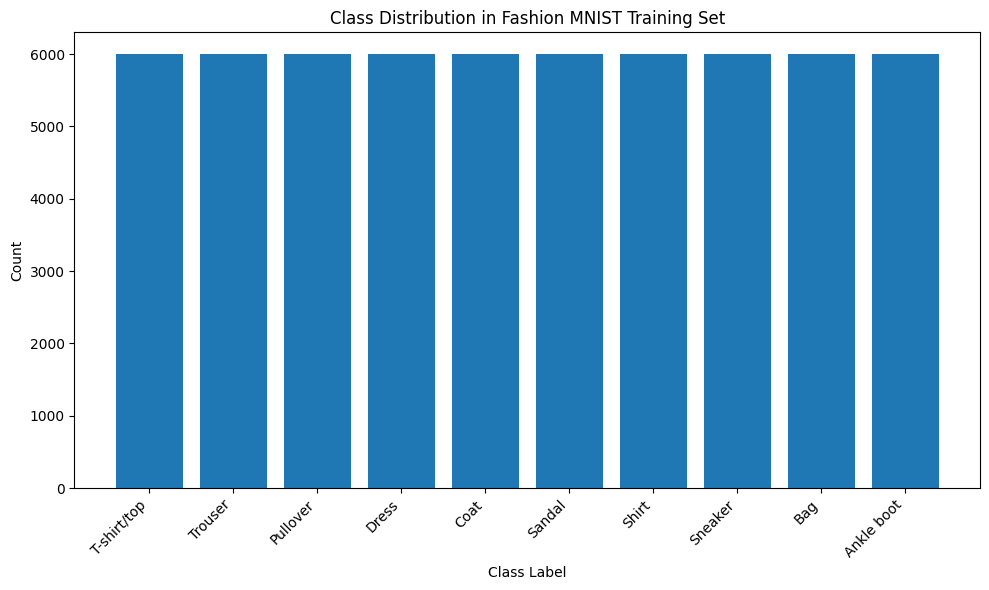

In [11]:
#  Check Class distribution

class_counts = dict(Counter(y_train))

plt.figure(figsize=(10, 6))
plt.bar(classes, [class_counts[i] for i in range(10)])
plt.title('Class Distribution in Fashion MNIST Training Set')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Balanced class distribution

In [12]:
# Function to plot the images with class names
def plot_image(X, y):
    plt.figure(figsize=(8,8))
    for index in range(20):
        plt.subplot(5,5,index+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(X[index])
        plt.xlabel(classes[y[index]])


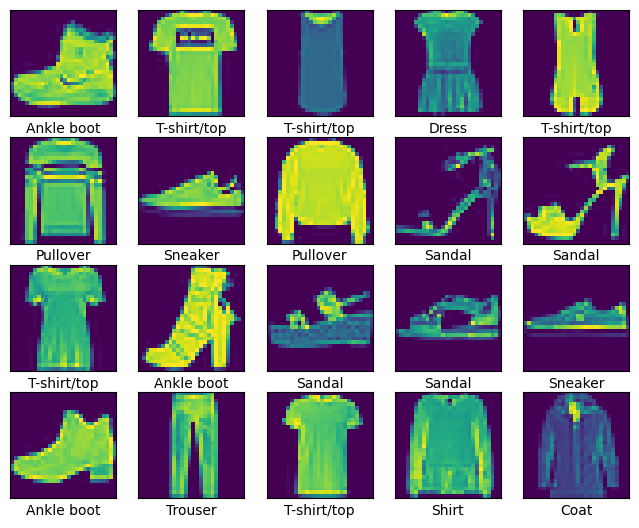

In [13]:
# Call the function to plot images
plot_image(X_train, y_train)

In [14]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_oh_train = to_categorical(y_train, 10)
y_oh_test = to_categorical(y_test, 10)

In [15]:
# Transformed labels
y_oh_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [16]:
# Create the neural network
model1 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Input layer: Flatten the 28x28 input images
    

    layers.Dense(128, activation='relu'), # Layer 2
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(128, activation='relu'), # Layer 3
    layers.Dropout(0.4),

    layers.Dense(64, activation='relu'), # Layer 4
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'), # Layer 5
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Dense(32, activation='relu'), # Layer 6
    layers.Dropout(0.1),
    layers.BatchNormalization(),

    layers.Dense(10,activation='sigmoid'), # Output Layer: 10 neurons for class probabilities, Sigmoid activation
])

c:\Users\shiri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Define accuracy metrics for the model
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

# Compile the model with loss function, suitable optimzer and evaluation metrics
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [18]:
# Summarize tha model layers and parameters
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,714 (518.41 KB)

 Trainable params: 132,266 (516.66 KB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
# Train the model
history = model1.fit(X_train, y_oh_train, # Train data and labels
              epochs=100, # Number of epoch
              batch_size = 100, # Batch size
              validation_data=(X_test, y_oh_test), # Define validation data
             )

# Model started overfitting, increased dropout and added 2 more layers to increase complexity to better extract more features. 
# Model performance balanced across training and validation data.
# Significant decrease in loss.

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4515 - loss: 1.5726 - precision: 0.1838 - recall: 0.8662 - val_accuracy: 0.7832 - val_loss: 0.5948 - val_precision: 0.2688 - val_recall: 0.9923
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7338 - loss: 0.7508 - precision: 0.2379 - recall: 0.9874 - val_accuracy: 0.8052 - val_loss: 0.5403 - val_precision: 0.2610 - val_recall: 0.9938
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7700 - loss: 0.6620 - precision: 0.2369 - recall: 0.9901 - val_accuracy: 0.8199 - val_loss: 0.4994 - val_precision: 0.2576 - val_recall: 0.9961
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7790 - loss: 0.6366 - precision: 0.2355 - recall: 0.9907 - val_accuracy: 0.8280 - val_loss: 0.4774 - val_precision: 0.2535 - val_recall: 0.9952
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7953 - loss: 0.5989 - precision: 0.2362 - recall: 0.9931 - val_accuracy: 0.8376 - val_los

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.8681 - loss: 0.3812 - precision: 0.2394 - recall: 0.9985
Test Accuracy : 86.70%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


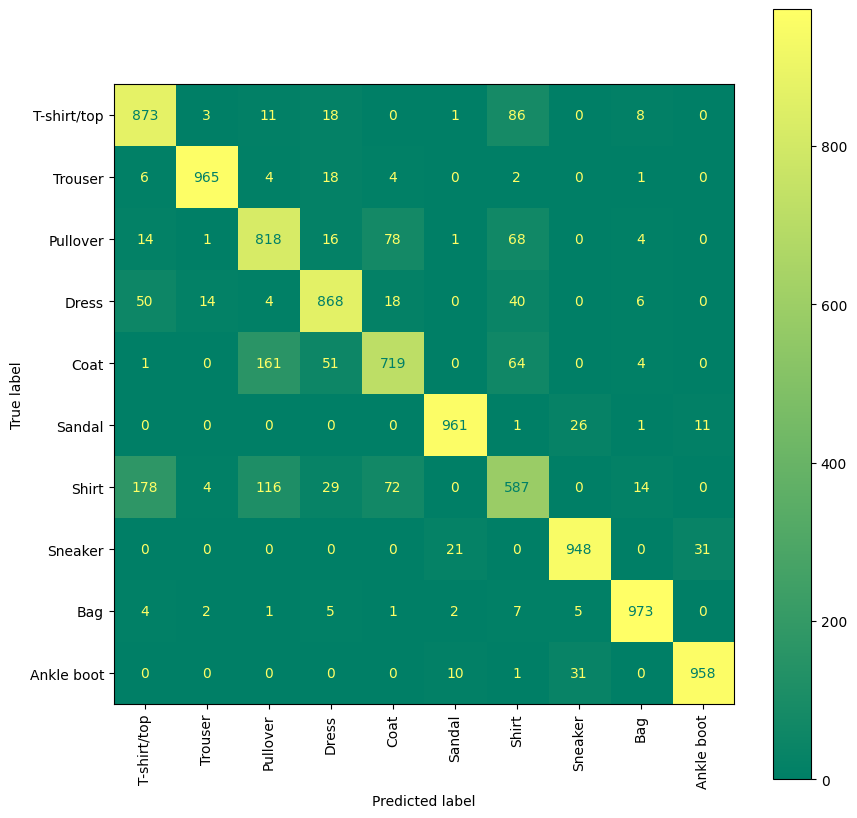

In [20]:
# Create confusion matrix to evaluate model performance
evaluation = model1.evaluate(X_test, y_oh_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred_prob = model1.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Convert y_oh_test to class labels if needed
y_true = np.argmax(y_oh_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')


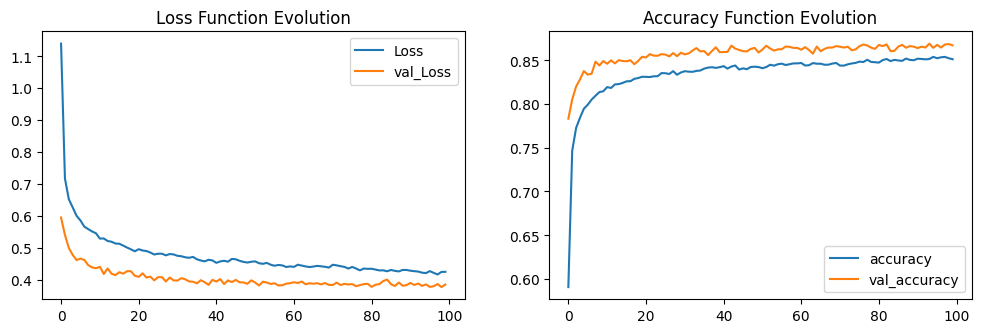

In [21]:
# Visualize loss and accuracy
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

# Consistent decrease in loss and increase in accuracy
# Loss and accuracy steady after 20th epoch
# Overall a succesful model

In [22]:
# Comparing the predicted v actual values
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_true), 1)), 1)

array([[9, 9],
       [2, 2],
       [1, 1],
       ...,
       [8, 8],
       [1, 1],
       [5, 5]], dtype=int64)